## Recurrence, Depth and High-dimensional data
# High-dimensional statistics

## Introduction

In this notebook we will:
- Get to know some fun properties of high dimensional spaces.
- Experience the curses and blessings of dimensionality.

In [314]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline
np.random.seed(0)

### Properties of High-Dimensional Space

1. Draw 10000 vectors at random in a 100-dimensional space. Generate each coordinate independently according to the same distribution (for example sample each coordinate uniformly from the interval [0, 1]). What is distribution of the the Euclidian norm of these vectors and why ?

2. [optional] Draw 100 points uniformly at random in a unit square. Select a point and measure the distance to all other points and observe the distribution of distances. Then increase the dimension and generate the points uniformly at random in a 100-dimensional unit cube. What happens to the distribution of distances and why?

3. [optional] Same question in the unit-radius circle and the unit radius sphere in p-dimensions.

- How vast are high dimensional spaces? Show that random vectors are orthogonal to one another in high dimension (recall that orthogonal vectors have a null dot product).

- The power of non-linearity revealed by SVD:
    - Sample 10000 points independently and at random from a 100-dimensional space. Randomly project these points in a 500-dimensional space (this corresponds to one stage of a linear neural network). What is the dimensionality of these linearly expanded data?
    - Compare it to the dimensionality of non-linear random expansions (for eg. apply a point-wise non-linearity to the linearly expanded data). Inspect the covariance eigenspectrum of the input, of the linear expansion and of the non-linear expansion.
    - Can you detect signatures of intrinsic low dimension of the data in the eigenspectrum?
    - [optional]  How can you use this heuristic definition of effective dimensionality ?
\begin{eqnarray}
N_{eff} = \frac{(\sum \lambda ) ^ 2}{ \sum \lambda ^ 2}
\end{eqnarray}

- Draw $N = 1000$ samples from a $P = 100$-dimensional Gaussian distribution with mean zeros and covaiance equal to the identity matrix. These are independent samples (no interaction) and their covariance should have one eigenvalue equal to one (in the infite sampling limit).
    - How does this prediction compare to the eigenspectrum of the empirical covariance?
    - How does this picture change as you vary the ratio $r = \frac{P}{N}$ (in many modern applications it is not uncommon to have $P$ in the order of $N$)?

### Optional Projects

** Taking a short mathematical promenade in high dimensional spaces**
- What is the volumes of the unit n-hypersphere and of the unit n-hypercube ? What happens to the ratio of these two volumes when n grows to infinity and what does it mean ?

$V_{n}={\frac {\pi ^{\frac {n}{2}}}{\Gamma \left({\frac {n}{2}}+1\right)}}$

In [313]:
np.power(2, 3)

8

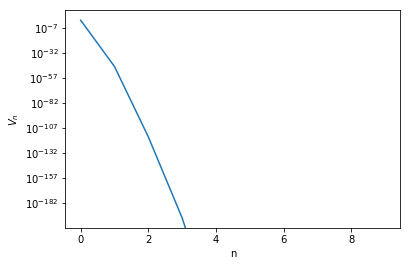

In [316]:
import scipy as sp
n = range(10, 1000, 100)
v = [np.power(np.pi, n / 2) / sp.special.gamma(n/2 + 1)for n in n]
plt.plot(v)
plt.yscale("log")
plt.xlabel("n")
plt.ylabel("$V_{n}$")
# plt.xscale("log")

- Illusions of Structure in High Dimensional Noise:
    - draw N = 2000 random points in P = 1000 dimensional space are drawn from a structureless zero mean, identity covariance Gaussian distribution. We will project these points onto different directions. What is the density of the projection of these points onto a random direction ? What is the density of the projection of these points onto the principal component vector ?
    - Now perform K-means clustering with K = 2 on the data (make sure that you know about Lloyd's algorithm first). Project these points onto the two clusters directions, what do you observe? How does this change with N and P?
    

In [43]:
N, P = 2000, 1000
x = np.random.normal(size = (N, P))

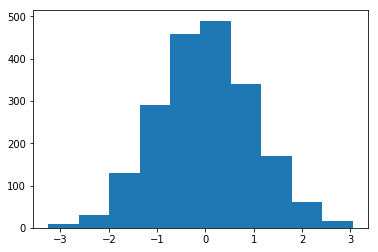

In [45]:
v = np.random.uniform(size = (P, 1))
v = v / np.linalg.norm(v)
x_project = np.dot(x, v)
plt.hist(x_project.flatten())
plt.show()

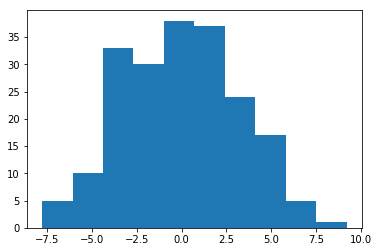

In [317]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 1).fit(x)
x_pca = pca.transform(x)
plt.hist(x_pca.flatten())
plt.show()

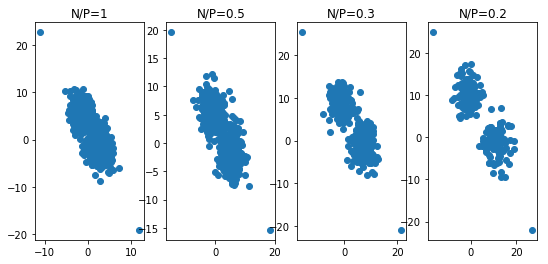

In [312]:
N, P = 300, 1000

plt.figure(figsize=(9, 4))

for (i, N) in enumerate([1000, 500, 300, 200]):
    x = np.random.normal(size = (N, P))

    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters = 2, random_state = 0).fit(x)

    x_kmeans = np.dot(x, kmeans.cluster_centers_.T)
    plt.subplot(1, 4, i + 1)
    plt.plot(x_kmeans[:, 0], x_kmeans[:, 1], "o")
    plt.title("N/P=%g" % (N/P))
    

- High Dimensional Inference:
    - learn about the Marchenko-Pastur distribution and use it to plot the theoretical spectrum of a random matrix. Compare this result with the eigenspectrum of the empirical covariance matrices of random and independent data points (each coordinate is a random Gaussian). What do you observe?
    - Let us now consider a minimal non-trivial case by adding a rank one perturbation to our identity covariance matrix. This is called the spiked model and it is a foundation of modern inference techniques (you are encouraged to do some reading about it). Vary the size of the perturbation (ie. change the SNR) and observe its signature in the eigenspectrum. Which perturbation are detectable? You should find a phase trasition (this is also true for the eigenvectors).
    - Can you think of a way to beat the threshold that you observed in the phase transition? (hint: use regularization techniques - aka. priors).
    

In [182]:
N=1000
P = 10000

In [265]:
def marchenko_pastur(P, N, X, xlim = (-1, 4), bins = "auto"):
    Y = np.dot(X.T, X) / N
    w = np.linalg.eigvals(Y)
    w_real, w_imag = np.real(w), np.imag(w)
    plt.hist(w_real, normed=True, bins = bins)

    c = P / N
    s = 1
    a = s**2 * (1 - np.sqrt(c))**2
    b = s**2 * (1 + np.sqrt(c))**2
    x = np.linspace(a, b, 10)
    y= [1 / (2 * np.pi * xx * c * s**2) * np.sqrt((b - xx) * (xx - a)) for xx in x]
    plt.plot(x, y)

    plt.xlim(xlim)
    plt.title("$N/P$ = %d" % (N / P))

/home/luyao/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/home/luyao/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


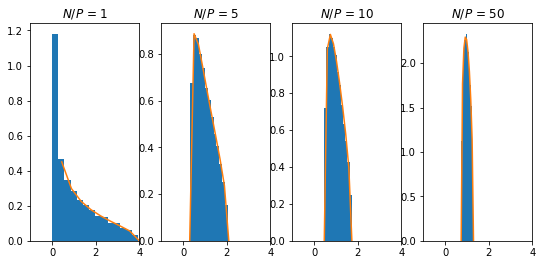

In [266]:
P = 1000
plt.figure(figsize=(9, 4))
for (i, N) in enumerate([1000, 5000, 10000, 50000]):
    plt.subplot(1, 4, i + 1)
    X = np.random.normal(size = (N, P))
    marchenko_pastur(P, N, X)

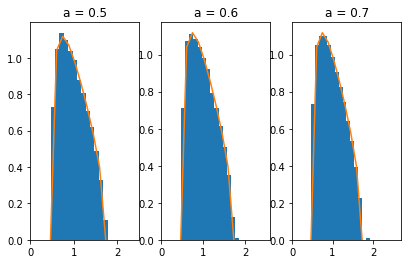

In [267]:
P, N = 1000, 10000

plt.figure(figsize=(9, 4))

for (i, a) in enumerate([0.5, 0.6, 0.7]):
    v = np.zeros((P, 1))
    v[P // 2] = 1
    conv =  np.eye(P) + a* np.dot(v, v.T)

    X = np.random.multivariate_normal(np.zeros(P), conv, size = (N))
  
    plt.subplot(1, 4, i + 1)
    marchenko_pastur(P, N, X, xlim = (0, a + 2))
    plt.title("a = %g" % a)

- Derive the non-linear learning dynamics of Linear Feedforward Network as in *Saxe Mcclelland Ganguli 2014 Exact solutions to the nonlinear dynamics of learning in deep linear neural networks*.
    - Can you reproduce the learning curves and the phase space plot of the weigths?
    - How could you extend this work to more complex models (eg. networks with non-linearities)?

some simple baseline code for the Linear Feedforward Network

In [269]:
def initialize_simple(n_input, n_hidden, n_output):
    params = {'n_input' : n_input,
              'n_hidden': n_hidden,
              'n_output': n_output}
    
    params['W1'] = np.random.randn(n_hidden,n_input)
    params['W2'] = np.random.randn(n_output,n_hidden)
    params['b1'] = np.random.randn(n_hidden,1) # this shape is important for broadcasting
    params['b2'] = np.random.randn(n_output,1)
    return params

p = initialize_simple(2,3,1)

In [270]:
def train_net(xall, yall, params, beta, n_iter, mini_batch):
    
    n_batch = np.shape(xall)[1]
    C_list = []
    
    for i in range(n_iter):

        ind   = np.random.randint(n_batch, size = mini_batch)
        x     = xall[:,ind]
        y     = yall[:,ind]
        
        h     = np.dot(params['W1'],x) + params['b1']
        y_hat = np.dot(params['W2'],h) + params['b2']

        C = np.sum((y-y_hat)**2)
        C_list.append(C)

        dCdy   = y_hat-y
        dCdWyh = np.dot(dCdy,h.T)/mini_batch
        dCdby  = np.mean(dCdy,axis=1,keepdims=True)

        params['W2'] -= beta * dCdWyh
        params['b2']  -= beta * dCdby

        dCdh   = np.dot(params['W2'].T, dCdy)
        dCdWhx = np.dot(dCdh,x.T)/mini_batch
        dCdbh  = np.mean(dCdh,axis=1,keepdims=True)

        params['W1'] -= beta*dCdWhx
        params['b1']  -= beta*dCdbh
    
    return params, C_list

In [271]:
# generate synthetic data
n_input = 50
n_output = 10
n_batch = 1000
x = np.random.randn(n_input,n_batch)
w = np.random.randn(n_output,n_input)
y = w.dot(x) > 0

# initialize
n_hidden = 100
params_init = initialize_simple(n_input, n_hidden, n_output)

In [272]:
%%time
params, C_list = train_net(x, y, params_init, beta = .001, n_iter = 100, mini_batch = n_batch)

CPU times: user 4.26 s, sys: 152 ms, total: 4.41 s
Wall time: 185 ms


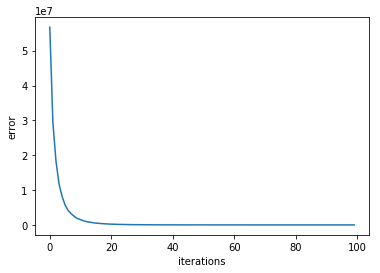

In [273]:
plt.figure()
plt.plot(C_list)
plt.ylabel('error')
plt.xlabel('iterations')
plt.show()

- Dropout seen as regularization by noise (Srivastava etal. 2014, section 9.1)
    - Consider the simple linear regression case, marginalizing the noise the objective function is:
\begin{eqnarray}
\text{minimize}_{\mathbf{w}} \mathbb{E}_{\mathbf{R} \sim \text{Bernoulli}(p)}[|| \mathbf{y} - (\mathbf{R} * \mathbf{X}) \mathbf{w}||^2 ]
\end{eqnarray}
Show that it reduces to:
\begin{eqnarray}
\text{minimize}_{\mathbf{w}} || \mathbf{y} - p \mathbf{X} \mathbf{w}||^2 + p(1-p) ||\Gamma \mathbf{w}||^2
\end{eqnarray}
where $\Gamma = \text{diag}(X^{T}X)^{1/2}$

    - How confident can we be in this interpretation of Dropout? What would you need to calculate in order to assess the accuracy of this approach? Can you derive a similar expression for more complex models (eg. RBM)?

In [ ]:
np.linalg.norm()